In [0]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
from google.colab import files
files.upload()

Saving result_nopilot1.csv to result_nopilot1.csv


{'result_nopilot1.csv': b',Mnemonic Code,Day of Confirmation Date,Bookings,Booking Status,Week_Number,year\r\n0,AUSVZ,2018-01-11,6,Confirmed,2,2018\r\n1,WDCDP,2018-01-11,9,Confirmed,2,2018\r\n2,SBAGG,2018-01-11,1,Confirmed,2,2018\r\n3,SABCN,2018-01-11,3,Confirmed,2,2018\r\n5,SABCN,2018-01-11,1,Cancelled,2,2018\r\n6,PHXPX,2018-01-11,5,Confirmed,2,2018\r\n14,PDXPM,2018-01-12,11,Confirmed,2,2018\r\n17,CLTKM,2018-01-12,13,Confirmed,2,2018\r\n18,MIAEP,2018-01-11,9,Confirmed,2,2018\r\n19,NTCME,2018-01-11,16,Cancelled,2,2018\r\n28,PDXPM,2018-01-13,17,Cancelled,2,2018\r\n29,PDXPM,2018-01-11,8,Confirmed,2,2018\r\n30,PDXPM,2018-01-13,31,Confirmed,2,2018\r\n33,PDXVP,2018-01-13,39,Confirmed,2,2018\r\n34,PITHM,2018-01-12,3,Confirmed,2,2018\r\n36,PHLPP,2018-01-11,2,Cancelled,2,2018\r\n37,PHLPP,2018-01-12,2,Confirmed,2,2018\r\n40,ORDTG,2018-01-13,6,Confirmed,2,2018\r\n42,ORDAL,2018-01-12,26,Confirmed,2,2018\r\n47,PITHM,2018-01-13,75,Confirmed,2,2018\r\n57,ORDAL,2018-01-11,13,Confirmed,2,2018\r\n61,SB

In [3]:

result_nopilot = pd.read_csv('result_nopilot1.csv')
result_nopilot['Mnemonic Code'] = result_nopilot['Mnemonic Code'].replace({'VRB':'MIAVB', 'EPC':'MIAEP','ANG':'MIAAG','EVT':'NYCAA',
      'MSE':'NTCME','LAP':'LAXWE','HWL':'LAXWM','TMO':'SFOBC'})
result_nopilot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95332 entries, 0 to 95331
Data columns (total 7 columns):
Unnamed: 0                  95332 non-null int64
Mnemonic Code               95332 non-null object
Day of Confirmation Date    95332 non-null object
Bookings                    95332 non-null int64
Booking Status              95332 non-null object
Week_Number                 95332 non-null int64
year                        95332 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.1+ MB


In [4]:
result_nopilot.head()

Unnamed: 0 Mnemonic Code Day of Confirmation Date  Bookings Booking Status  \
0           0         AUSVZ               2018-01-11         6      Confirmed   
1           1         WDCDP               2018-01-11         9      Confirmed   
2           2         SBAGG               2018-01-11         1      Confirmed   
3           3         SABCN               2018-01-11         3      Confirmed   
4           5         SABCN               2018-01-11         1      Cancelled   

   Week_Number  year  
0            2  2018  
1            2  2018  
2            2  2018  
3            2  2018  
4            2  2018

In [5]:
result_nopilot['Day of Confirmation Date'] = pd.to_datetime(result_nopilot['Day of Confirmation Date'], errors='coerce')
result_nopilot=result_nopilot.sort_values(['Day of Confirmation Date'])
result_nopilot['month_year'] = result_nopilot['Day of Confirmation Date'].dt.to_period('M') 
result_nopilot['Total_Bookings']=result_nopilot.groupby(['Mnemonic Code','month_year','Booking Status'])['Bookings'].transform('sum')
result_nopilot.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 95332 entries, 37125 to 34625
Data columns (total 9 columns):
Unnamed: 0                  95332 non-null int64
Mnemonic Code               95332 non-null object
Day of Confirmation Date    95332 non-null datetime64[ns]
Bookings                    95332 non-null int64
Booking Status              95332 non-null object
Week_Number                 95332 non-null int64
year                        95332 non-null int64
month_year                  95332 non-null period[M]
Total_Bookings              95332 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2), period[M](1)
memory usage: 7.3+ MB


In [0]:
Forecast=result_nopilot.drop(['Day of Confirmation Date',
       'Bookings','Week_Number','year','Unnamed: 0'], axis=1)
Forecast=Forecast.drop_duplicates()




In [7]:
Forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4442 entries, 37125 to 34255
Data columns (total 4 columns):
Mnemonic Code     4442 non-null object
Booking Status    4442 non-null object
month_year        4442 non-null period[M]
Total_Bookings    4442 non-null int64
dtypes: int64(1), object(2), period[M](1)
memory usage: 173.5+ KB


In [0]:

X=Forecast[Forecast['Mnemonic Code'].str.contains("SFOBC")]
X_Confirm=X[X['Booking Status'].str.contains("Confirmed")]
X_Confirm=X_Confirm.drop(['Mnemonic Code','Booking Status'], axis=1)





In [9]:
X_Confirm.describe().transpose()

count     mean        std   min    25%    50%     75%    max
Total_Bookings   40.0  136.425  60.650274  46.0  88.25  138.5  166.25  290.0

In [10]:
X_Confirm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 36701 to 34311
Data columns (total 2 columns):
month_year        40 non-null period[M]
Total_Bookings    40 non-null int64
dtypes: int64(1), period[M](1)
memory usage: 960.0 bytes


In [11]:
#MIAVB_Confirm=MIAVB_Confirm.drop_duplicates()
X_Confirm.set_index('month_year', inplace=True)
X_Confirm.tail(8)


Total_Bookings
month_year                
2018-09                 72
2018-10                 83
2018-11                 55
2018-12                 46
2019-01                 68
2019-02                 74
2019-03                163
2019-04                 53

## **VISUALIZATION**


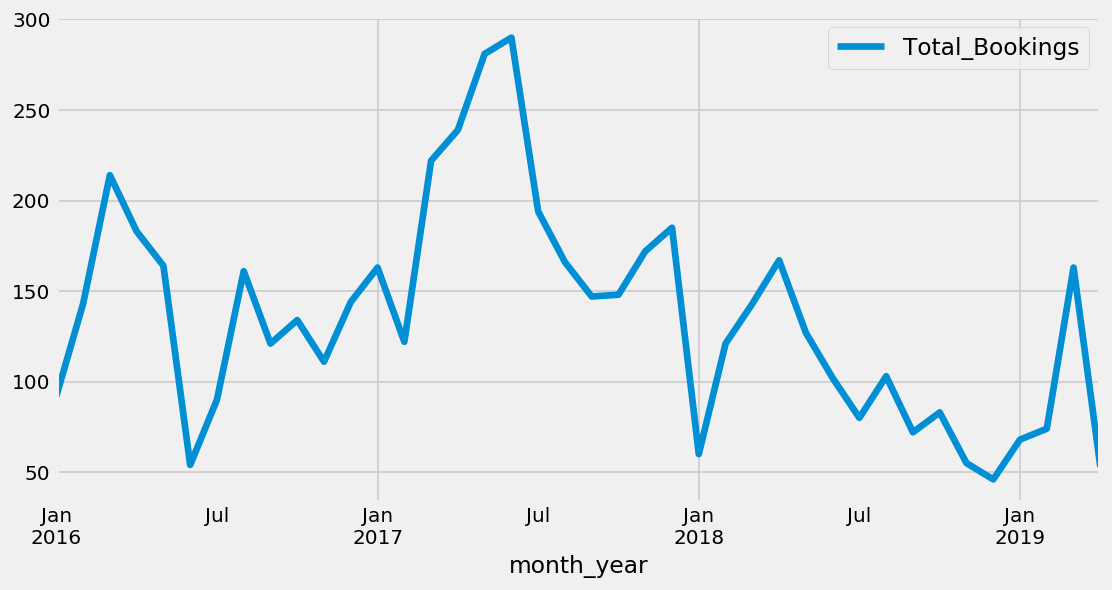

In [12]:
X_Confirm.plot(figsize=(10, 5))
plt.show()

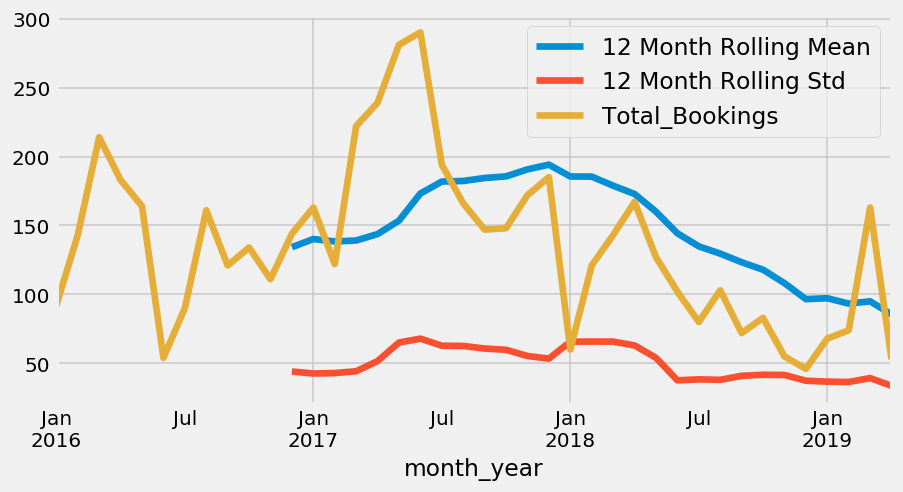

In [13]:
X_Confirm.Total_Bookings.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(8, 4))
X_Confirm.Total_Bookings.rolling(12).std().plot(label='12 Month Rolling Std',figsize=(8, 4))
X_Confirm.Total_Bookings.plot()
plt.legend()

<Figure size 1440x1080 with 0 Axes>

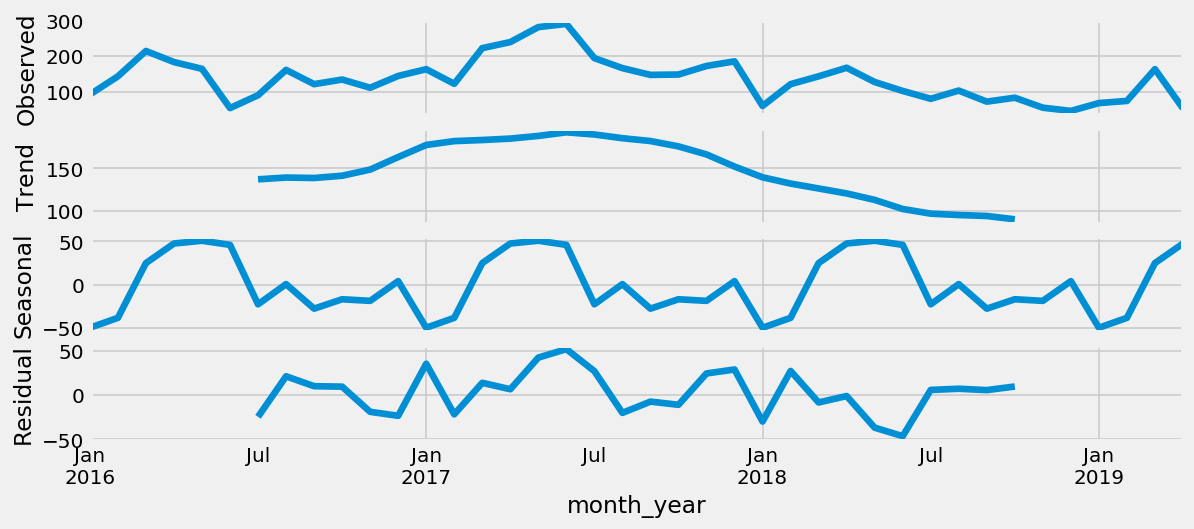

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(X_Confirm['Total_Bookings'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(10, 4)


In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_check(X_Confirm['Total_Bookings'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.743804255275487
p-value : 0.06676007123305766
#Lags Used : 0
Number of Observations Used : 39
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
X_Confirm['firstod']=X_Confirm.Total_Bookings-X_Confirm.Total_Bookings.shift(1)
X_Confirm.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 40 entries, 2016-01 to 2019-04
Freq: M
Data columns (total 2 columns):
Total_Bookings    40 non-null int64
firstod           39 non-null float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


In [19]:
adf_check(X_Confirm['firstod'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.983861109055776
p-value : 8.062312663814365e-10
#Lags Used : 0
Number of Observations Used : 38
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


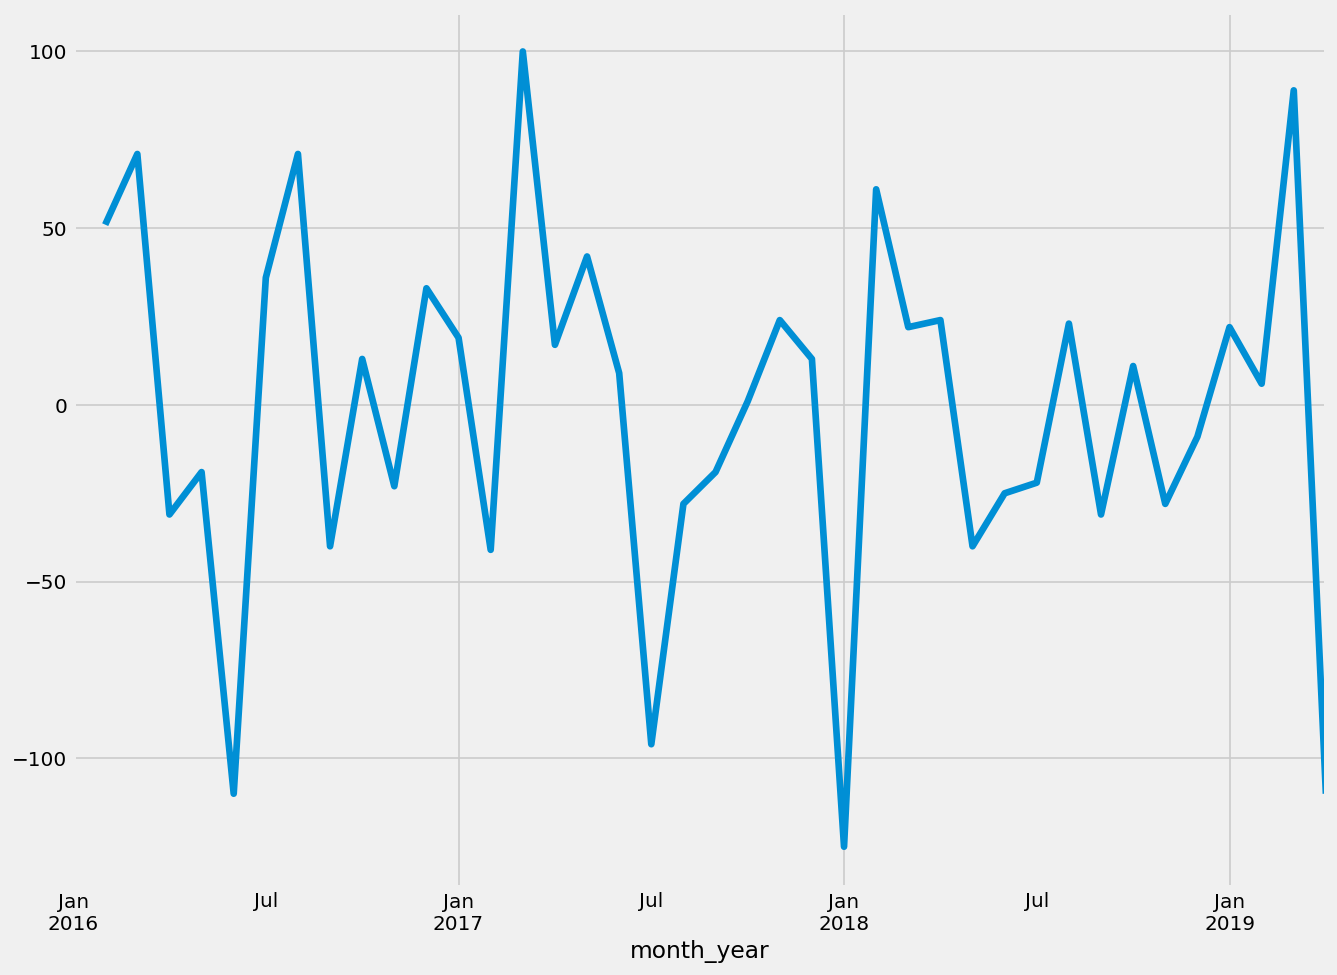

In [20]:
X_Confirm['firstod'].plot()

**Modelling ARIMA**""

In [0]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:

df=X_Confirm.Total_Bookings[:'2018-12']
df=pd.DataFrame(df)

In [0]:
!pip install pmdarima

    100% |████████████████████████████████| 921kB 21.4MB/s 


In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Total_Bookings,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)
ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:454.3285580479924
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:382.44840057054523
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:357.3911698201722
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:309.12583818626575
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:366.61183006185166
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:353.00038824166586
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:321.19920891875466
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:311.06344394585665
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:412.12557353925433
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:351.2250943698024
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:336.5031378347947
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:288.04645815927614
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:358.30473139902415
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:332.7560695676983
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:310.25968299257624
AR

In [23]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.Total_Bookings, start_p=2, start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1,
                      start_Q=1,
                      max_P=2, max_Q=2,
                      D=0,
                      random_state=20,
                      n_fits=30,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=390.985, BIC=403.653, Fit time=0.309 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=400.010, BIC=403.177, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=383.477, BIC=389.811, Fit time=0.051 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=388.753, BIC=395.087, Fit time=0.072 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=381.780, BIC=386.531, Fit time=0.037 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 4); AIC=383.493, BIC=389.827, Fit time=0.081 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 4); AIC=385.472, BIC=393.390, Fit time=0.097 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=383.650, BIC=389.984, Fit time=0.047 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=383.658, BIC=389.992, Fit time=0.052 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 4);

In [96]:
# We have seasonal data!
model = SARIMAX(df.Total_Bookings,order=(0,1,2),seasonal_order=(0,0,0,4),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:         Total_Bookings   No. Observations:                   36
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -168.349
Date:                Tue, 30 Apr 2019   AIC                            342.697
Time:                        07:23:19   BIC                            347.094
Sample:                    01-31-2016   HQIC                           344.155
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2103      0.256     -0.821      0.412      -0.713       0.292
ma.L2         -0.1665      0.192     -0.869      0.385      -0.542       0.209
sigma2      2169.6359    459.718      4.719      0.0

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-01'),end=pd.to_datetime('2019-03'), dynamic=True)
pred_ci = pred.conf_int()

In [0]:
s_forecasted = pred.predicted_mean
s_forecasted=pd.DataFrame(s_forecasted)
s_forecasted.columns = ['pred_bookings']
s_truth = X_Confirm.Total_Bookings['2019-01':'2019-03']

In [99]:
s_truth=pd.DataFrame(s_truth)
s_truth

Total_Bookings
month_year                
2019-01                 68
2019-02                 74
2019-03                163

In [100]:
s_forecasted

pred_bookings
2019-01      54.524419
2019-02      56.997524
2019-03      56.997524

In [88]:
X_Confirm

Total_Bookings  firstod
month_year                         
2016-01                 92      NaN
2016-02                143     51.0
2016-03                214     71.0
2016-04                183    -31.0
2016-05                164    -19.0
2016-06                 54   -110.0
2016-07                 90     36.0
2016-08                161     71.0
2016-09                121    -40.0
2016-10                134     13.0
2016-11                111    -23.0
2016-12                144     33.0
2017-01                163     19.0
2017-02                122    -41.0
2017-03                222    100.0
2017-04                239     17.0
2017-05                281     42.0
2017-06                290      9.0
2017-07                194    -96.0
2017-08                166    -28.0
2017-09                147    -19.0
2017-10                148      1.0
2017-11                172     24.0
2017-12                185     13.0
2018-01                 60   -125.0
2018-02                121     61.0
2018-03                143     22.0
2018-04                167     24.0
2018-05                127    -40.0
2018-06                102    -25.0
2018-07                 80    -22.0
2018-08                103     23.0
2018-09                 72    -31.0
2018-10                 83     11.0
2018-11                 55    -28.0
2018-12                 46     -9.0
2019-01                 68     22.0
2019-02                 74      6.0
2019-03                163     89.0
2019-04                 53   -110.0

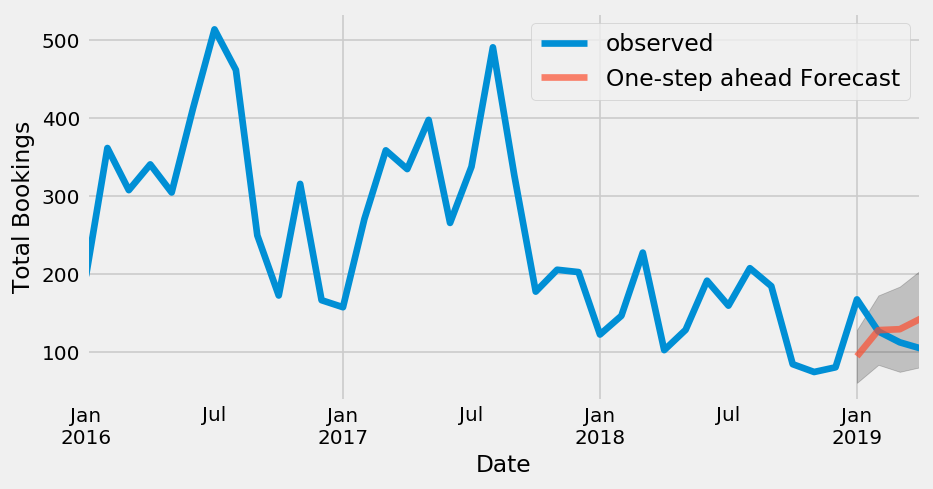

In [147]:
ax = X_Confirm.Total_Bookings['2016-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(8, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total Bookings')
plt.legend()

plt.show()

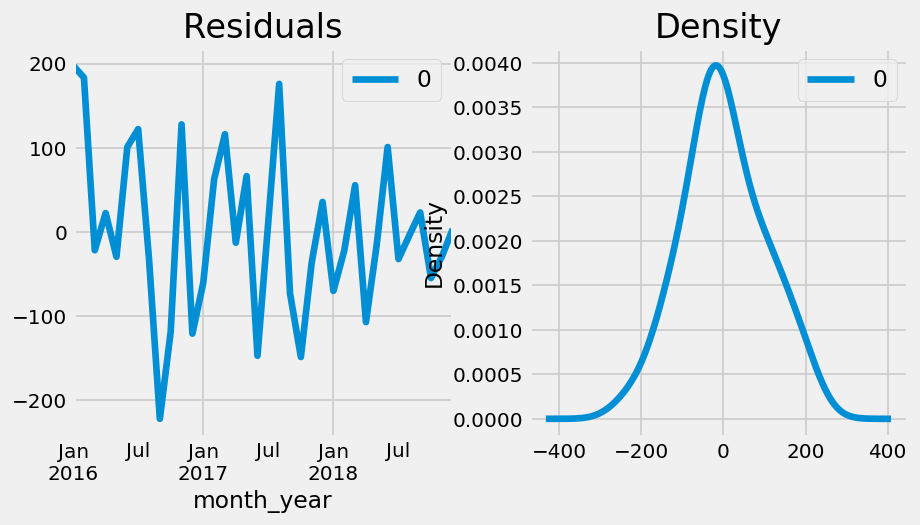

In [280]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],figsize=(8, 4))
residuals.plot(kind='kde', title='Density', ax=ax[1], figsize=(8, 4))
plt.show()

In [101]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#    acf1 = acf(fc-test)[1] 
#    acf1=acf(s_forecasted['pred_bookings']-s_truth['Total_Bookings'])                     # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(s_forecasted['pred_bookings'],s_truth['Total_Bookings'])

{'corr': 0.5480396214573181,
 'mae': 45.49351118111664,
 'mape': 0.3594184813128023,
 'me': -45.49351118111664,
 'minmax': 0.3594184813128023,
 'mpe': -0.3594184813128023,
 'rmse': 62.46919352839044}

In [0]:
# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

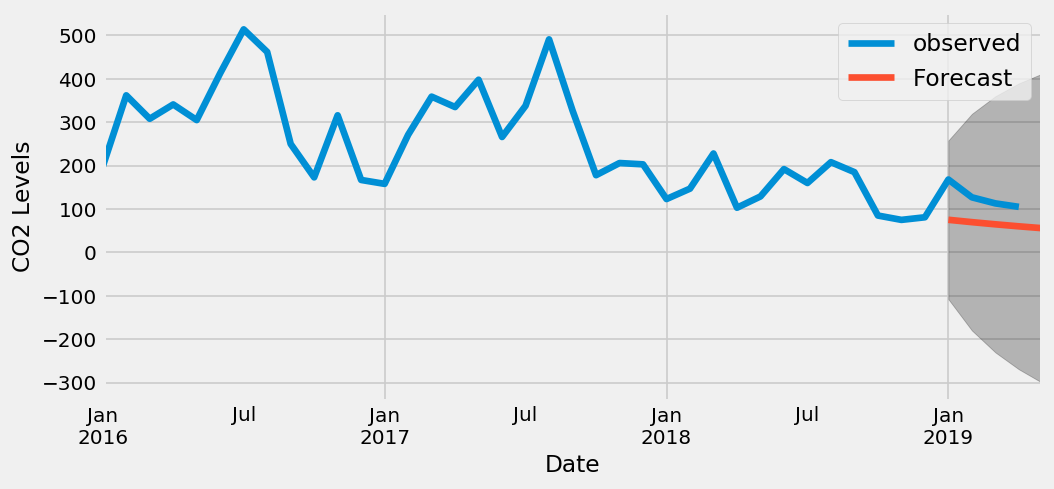

In [41]:
ax = X_Confirm.Total_Bookings.plot(label='observed', figsize=(9, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()